# How does a Bike-share naviagte speedy success?

This is a project of Google data analystics course. Instead of solving it in R, i used Python and i have followed the six steps of the data analyst process: ask, prepare, process, analyze, share and act. i have used the Case Study Roadmap provided in the course. In the end i have used predicted models of machine learning for further investigation.

## Scenario and roles

This is a fictional study of a bike sharing company in Chicago. Director of marketing team and manager is the main stakeholder for whom the the project is done. The datasets are provided in the link: https://divvy-tripdata.s3.amazonaws.com/index.html. i am investigated 12 months of CSv files dated from August, 2022 to september, 2023.

## Ask

### Business Task:

The main objective of this analysis is to design marketing strategies to convert casual riders to annual members.
Questions:

1) How do annual members and casual riders use Cuclistic bikes differently? 2) Why would casual riders buy Cylcistic annial memberships? 3) How can Cyclistic use digital media to incluence casual riders to become members?

I will find these answers throughout the process and for this reason my whole focus will be on comparing the annual and casual members.
Key Stakeholders:

1) LiLy Moreno- Director of the marketing team and my supervisor 2) Cyclistic executive team
Prepare

i have been provided the historical data through this link: https://divvy-tripdata.s3.amazonaws.com/index.html. i have downloaded the csv files dated from August, 2022 to september, 2023 and according to its source and license copyright These datasets are ofcourse ROCCC. The names of the datasets are not the same and they are start with numbers.

In the followinng process, i have made function datasets_read() which will read every .csv files contained in the specific folders and assigned a vairable for every dataset of every csv file.


In [1]:
#Loading libraries needed for the investigation
import pandas as pd
import numpy as np
import os, fnmatch
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from pandas.api.types import CategoricalDtype
import seaborn as sns
import folium
%matplotlib inline

#replace hyphens with underscore in filenames 

def datasets_read(directory):
    #replace hyphens with underscore in filenames 
    for filename in os.listdir(directory):
        ##replace hyphens with underscore in filenames
        os.rename(os.path.join(directory,filename),os.path.join(directory, filename.replace('-', '_')))
directory='C:/courses_and_projects/202208-202307/'
datasets_read(directory)


In [2]:
files = os.listdir(directory) # Returns list of files in the folder which is specifed path

for file in files:
    if file.endswith(".csv"):# Checking wheter file endswith .csv
        # os.sep returns the separtor of operator system
        exec(f"Bike"+f"{file[:6]} = pd.read_csv('{directory}{file}')")
        print(f"Bike"+f"{file[:6]} = pd.read_csv('{directory}{file}')")
        

Bike202208 = pd.read_csv('C:/courses_and_projects/202208-202307/202208_divvy_tripdata.csv')
Bike202209 = pd.read_csv('C:/courses_and_projects/202208-202307/202209_divvy_tripdata.csv')
Bike202210 = pd.read_csv('C:/courses_and_projects/202208-202307/202210_divvy_tripdata.csv')
Bike202211 = pd.read_csv('C:/courses_and_projects/202208-202307/202211_divvy_tripdata.csv')
Bike202212 = pd.read_csv('C:/courses_and_projects/202208-202307/202212_divvy_tripdata.csv')
Bike202301 = pd.read_csv('C:/courses_and_projects/202208-202307/202301_divvy_tripdata.csv')
Bike202302 = pd.read_csv('C:/courses_and_projects/202208-202307/202302_divvy_tripdata.csv')
Bike202303 = pd.read_csv('C:/courses_and_projects/202208-202307/202303_divvy_tripdata.csv')
Bike202304 = pd.read_csv('C:/courses_and_projects/202208-202307/202304_divvy_tripdata.csv')
Bike202305 = pd.read_csv('C:/courses_and_projects/202208-202307/202305_divvy_tripdata.csv')
Bike202306 = pd.read_csv('C:/courses_and_projects/202208-202307/202306_divvy_tri

After checking the datasets, every dataset has 13 columns or attributes and the data types are consistent.

## Process

As i have mentioned before i am using Python in jupyter notebook to clean, analyze, and merge all the datasets so that we can have an accurate picture of what datasets are telling.

For this process we will be combining all the data sets since all the datasets have same informations

For this process we need to manipulate the data. thats why we need to Concat all the files into single data frame

In [3]:
Bike_share_data=pd.concat([Bike202208,Bike202209,Bike202210,Bike202211,Bike202212,Bike202301,Bike202302,Bike202303,Bike202304,Bike202305,Bike202306,Bike202307])

#### Begin inspection
we'll the check the dataframes data types, duplicates etc

In [4]:
Bike_share_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng              object
end_lat               float64
end_lng                object
member_casual          object
dtype: object

In [5]:
Bike_share_data.shape

(5723606, 13)

In [6]:
Bike_share_data.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [7]:
Bike_share_data.isnull().values.sum()

3600037

In [8]:
Bike_share_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022_08_07 21:34:15,2022_08_07 21:41:46,NaN,NaN,NaN,NaN,41.93,_87.69,41.94,_87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022_08_08 14:39:21,2022_08_08 14:53:23,NaN,NaN,NaN,NaN,41.89,_87.64,41.92,_87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022_08_08 15:29:50,2022_08_08 15:40:34,NaN,NaN,NaN,NaN,41.97,_87.69,41.97,_87.66,casual
3,F597830181C2E13C,electric_bike,2022_08_08 02:43:50,2022_08_08 02:58:53,NaN,NaN,NaN,NaN,41.94,_87.65,41.97,_87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022_08_07 20:24:06,2022_08_07 20:29:58,NaN,NaN,NaN,NaN,41.85,_87.65,41.84,_87.66,casual


In [9]:
Bike_share_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
767645    False
767646    False
767647    False
767648    False
767649    False
Length: 5723606, dtype: bool

Our main objective was to find a marketing strategy to convert casual riders to annual members. For this reason we have to make new columns depending upon 

In [10]:
Bike_share_data['started_at']= pd.to_datetime(Bike_share_data['started_at'],format="%Y_%m_%d %H:%M:%S")
Bike_share_data['ended_at']= pd.to_datetime(Bike_share_data['ended_at'],format="%Y_%m_%d %H:%M:%S")

In [11]:
Bike_share_data['started_at'].head()

0   2022-08-07 21:34:15
1   2022-08-08 14:39:21
2   2022-08-08 15:29:50
3   2022-08-08 02:43:50
4   2022-08-07 20:24:06
Name: started_at, dtype: datetime64[ns]

In [12]:
Bike_share_data['hour'] = Bike_share_data['started_at'].dt.hour
Bike_share_data =Bike_share_data.astype({'hour':'int8'})
Bike_share_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,_87.69,41.94,_87.72,casual,21
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,_87.64,41.92,_87.64,casual,14
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,_87.69,41.97,_87.66,casual,15
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,_87.65,41.97,_87.69,casual,2
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,_87.65,41.84,_87.66,casual,20


In [13]:
Bike_share_data['dayofweek'] = Bike_share_data['started_at'].dt.day_name()

In [14]:
Bike_share_data['month'] = Bike_share_data['started_at'].dt.month_name()

In [15]:
import datetime as datetime
Bike_share_data['ride_length'] = (Bike_share_data['ended_at'] - Bike_share_data['started_at']) / datetime.timedelta(minutes=1)
Bike_share_data['ride_length'] = Bike_share_data['ride_length'].astype('int32')
print(Bike_share_data['ride_length'])

0          7
1         14
2         10
3         15
4          5
          ..
767645     9
767646     0
767647     9
767648     9
767649     4
Name: ride_length, Length: 5723606, dtype: int32


In [16]:
Bike_share_data[Bike_share_data['ride_length'] <= 0].count()

ride_id               151721
rideable_type         151721
started_at            151721
ended_at              151721
start_station_name    108631
start_station_id      108624
end_station_name       93435
end_station_id         93432
start_lat             151721
start_lng             151721
end_lat               151719
end_lng               151719
member_casual         151721
hour                  151721
dayofweek             151721
month                 151721
ride_length           151721
dtype: int64

In [17]:
Bike_share_data = Bike_share_data.drop(Bike_share_data[Bike_share_data.ride_length <= 0].index)

In [18]:
Bike_share_data.loc[:,("start_lng")]=Bike_share_data["start_lng"].astype(str).str.replace('_', '-').astype(float)
Bike_share_data.loc[:,("end_lng")]=Bike_share_data["end_lng"].astype(str).str.replace('_', '-').astype(float)
Bike_share_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,dayofweek,month,ride_length
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual,21,Sunday,August,7
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual,14,Monday,August,14
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual,2,Monday,August,15
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual,20,Sunday,August,5
5,BFA7E7CC69860C20,electric_bike,2022-08-08 13:06:08,2022-08-08 13:19:09,NaN,NaN,NaN,NaN,41.79,-87.72,41.82,-87.69,casual,13,Monday,August,13


In [19]:
Bike_share_data['month'].dtype

dtype('O')

In [20]:
Bike_share_data_inv=Bike_share_data.dropna(inplace=False)

In [21]:
Bike_share_data_inv.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,dayofweek,month,ride_length
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual,16,Friday,August,9
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,14,Sunday,August,61
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual,16,Sunday,August,14
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,2,Sunday,August,92
501,5221F9363BD7E5B6,electric_bike,2022-08-20 00:25:36,2022-08-20 00:27:20,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922693,-87.697057,41.922695,-87.697153,casual,0,Saturday,August,1


In [22]:
Bike_share_data_inv.describe()

,started_at,ended_at,start_lat,end_lat,hour,ride_length
count,3450207,3450207,3.450207e+06,3.450207e+06,3.450207e+06,3.450207e+06
mean,2023-01-31 16:19:39.095836928,2023-01-31 16:35:58.459064832,4.190153e+01,4.190188e+01,1.410476e+01,1.583198e+01
min,2022-08-01 00:00:11,2022-08-01 00:05:44,4.164850e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,2022-09-24 20:36:47.500000,2022-09-24 20:54:35,4.188096e+01,4.188103e+01,1.100000e+01,5.000000e+00
50%,2023-02-15 13:00:43,2023-02-15 13:12:42,4.189662e+01,4.189675e+01,1.500000e+01,1.000000e+01
75%,2023-06-02 20:59:05,2023-06-02 21:18:48.500000,4.192871e+01,4.192883e+01,1.800000e+01,1.800000e+01
max,2023-07-31 23:59:15,2023-08-01 20:40:50,4.206485e+01,4.206485e+01,2.300000e+01,1.213600e+04
std,NaN,NaN,4.262879e-02,5.794933e-02,4.912090e+00,3.435032e+01


In [23]:
Bike_share_data_inv['rideable_type'].value_counts()

rideable_type
classic_bike     1983725
electric_bike    1364160
docked_bike       102322
Name: count, dtype: int64

In [24]:
Bike_data_inv=Bike_share_data_inv.drop(['ride_id','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','hour','month'],axis='columns')
Bike_data_inv.head()

,rideable_type,started_at,member_casual,dayofweek,ride_length
142,classic_bike,2022-08-05 16:13:36,casual,Friday,9
329,classic_bike,2022-08-21 14:09:08,casual,Sunday,61
357,electric_bike,2022-08-21 16:15:12,casual,Sunday,14
422,classic_bike,2022-08-21 02:11:26,casual,Sunday,92
501,electric_bike,2022-08-20 00:25:36,casual,Saturday,1


In [25]:
Bike_data_inv.dtypes

rideable_type            object
started_at       datetime64[ns]
member_casual            object
dayofweek                object
ride_length               int32
dtype: object

In [26]:
Bike_data_inv['Month']=Bike_data_inv['started_at'].dt.month
Bike_data_inv.Month.value_counts()

Month
8     501613
7     461930
9     438251
6     431314
5     371479
10    328499
4     258887
11    194735
3     149710
2     108630
1     107738
12     97421
Name: count, dtype: int64

In [27]:
Bike_data_inv['Season'] = pd.cut(Bike_data_inv['Month'],
                            [0,3,9,12],
                            labels = ['Cold', 'Warm', 'Cold'],
                             include_lowest=True,
                            ordered=False)

In [28]:
Bike_data_inv['Part_of_Week'] = np.where((Bike_data_inv['dayofweek'] == 'Saturday') | (Bike_data_inv['dayofweek'] == 'Sunday'), 1,0)
Bike_data_inv.head()

,rideable_type,started_at,member_casual,dayofweek,ride_length,Month,Season,Part_of_Week
142,classic_bike,2022-08-05 16:13:36,casual,Friday,9,8,Warm,0
329,classic_bike,2022-08-21 14:09:08,casual,Sunday,61,8,Warm,1
357,electric_bike,2022-08-21 16:15:12,casual,Sunday,14,8,Warm,1
422,classic_bike,2022-08-21 02:11:26,casual,Sunday,92,8,Warm,1
501,electric_bike,2022-08-20 00:25:36,casual,Saturday,1,8,Warm,1


In [29]:
Bike_data_inv['Hours'] = Bike_data_inv['started_at'].dt.hour

In [30]:
Bike_data_inv['Part_of_Day'] = pd.cut(Bike_data_inv['Hours'],
                            [0,4,8,16,20,23],
                            labels = ['Late_Night', 'Morning', 'Afternoon','Evening', 'Night'],
                             include_lowest=True,
                            ordered=False)

In [31]:
Bike_data_inv.Part_of_Day.value_counts()

Part_of_Day
Afternoon     1619915
Evening       1008516
Morning        452517
Night          269613
Late_Night      99646
Name: count, dtype: int64

In [32]:
Bike_data_inv['Ride_Type'] = np.where(Bike_data_inv['member_casual'] == 'member',1,0)


# Break categorical data into numerical form using One-Hot Encoding via pandas get_dummies

In [33]:
rideType_dummies = pd.get_dummies(Bike_data_inv['rideable_type'])
season_dummies = pd.get_dummies(Bike_data_inv['Season'])
partOfDay_dummies = pd.get_dummies(Bike_data_inv['Part_of_Day'])

In [34]:
Bike_data_inv=pd.concat([Bike_data_inv,rideType_dummies,season_dummies,partOfDay_dummies],axis=1)
Bike_data_inv=Bike_data_inv.drop(columns=['Part_of_Day', 'dayofweek', 'Season','started_at', 'rideable_type', 'member_casual'])
Bike_data_inv.head()

,ride_length,Month,Part_of_Week,Hours,Ride_Type,classic_bike,docked_bike,electric_bike,Cold,Warm,Late_Night,Morning,Afternoon,Evening,Night
142,9,8,0,16,0,True,False,False,False,True,False,False,True,False,False
329,61,8,1,14,0,True,False,False,False,True,False,False,True,False,False
357,14,8,1,16,0,False,False,True,False,True,False,False,True,False,False
422,92,8,1,2,0,True,False,False,False,True,True,False,False,False,False
501,1,8,1,0,0,False,False,True,False,True,True,False,False,False,False


In [35]:
Bike_data_inv.isna().sum()

ride_length      0
Month            0
Part_of_Week     0
Hours            0
Ride_Type        0
classic_bike     0
docked_bike      0
electric_bike    0
Cold             0
Warm             0
Late_Night       0
Morning          0
Afternoon        0
Evening          0
Night            0
dtype: int64

In [36]:
Bike_data_inv.head()

,ride_length,Month,Part_of_Week,Hours,Ride_Type,classic_bike,docked_bike,electric_bike,Cold,Warm,Late_Night,Morning,Afternoon,Evening,Night
142,9,8,0,16,0,True,False,False,False,True,False,False,True,False,False
329,61,8,1,14,0,True,False,False,False,True,False,False,True,False,False
357,14,8,1,16,0,False,False,True,False,True,False,False,True,False,False
422,92,8,1,2,0,True,False,False,False,True,True,False,False,False,False
501,1,8,1,0,0,False,False,True,False,True,True,False,False,False,False


# Data Analyze

In [37]:
df = Bike_share_data.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,1748572
member,2820178


In [38]:
arl = Bike_share_data.groupby('member_casual', as_index=True)[['ride_length']].mean()
arl

,ride_length
member_casual,
casual,28.882617
member,12.296258


In [39]:
arl.to_csv("C:/courses_and_projects/202208-202307/forp/1/rideLengthmembers.csv")

In [40]:
rt_pivot = pd.pivot_table(Bike_share_data, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          639091
              member         1347702
docked_bike   casual          104795
electric_bike casual         1004686
              member         1472476
total count                  4568750

In [41]:
pdw_pivot = pd.pivot_table(Bike_share_data, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          270717
            member          410089
Monday      casual          208054
            member          397944
Saturday    casual          351771
            member          367726
Sunday      casual          267918
            member          307022
Thursday    casual          232189
            member          451285
Tuesday     casual          206743
            member          437372
Wednesday   casual          211180
            member          448740
total count                4568750

In [42]:
pm_pivot = pd.pivot_table(Bike_share_data, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          115404
            member          219564
August      casual          295067
            member          352990
December    casual           32760
            member           99079
February    casual           31201
            member          106790
January     casual           29139
            member          108734
July        casual          273494
            member          357016
June        casual          247784
            member          340306
March       casual           46286
            member          146102
May         casual          189953
            member          297791
November    casual           77910
            member          182037
October     casual          167716
            member          278896
September   casual          241858
            member          330873
total count                4568750

In [43]:
pm_pivot.to_csv(
    "C:/courses_and_projects/202208-202307/forp/1/tableau1monthly.csv")

In [44]:
rdw_pivot = pd.pivot_table(Bike_share_data, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          28.254890
                       member          12.270636
Monday                 casual          28.173239
                       member          11.708529
Saturday               casual          33.466255
                       member          13.865658
Sunday                 casual          33.901123
                       member          13.633531
Thursday               casual          24.303369
                       member          11.784852
Tuesday                casual          25.846408
                       member          11.788766
Wednesday              casual          24.391439
                       member          11.648806
total ride_length mean                 18.644262

In [45]:
rdw_pivot.to_csv(
    "C:/courses_and_projects/202208-202307/forp/1/tableau2daily.csv")

In [46]:
rlm_pivot = pd.pivot_table(Bike_share_data, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          27.614303
                       member          11.618990
August                 casual          29.638750
                       member          13.230457
December               casual          23.850336
                       member          10.381928
February               casual          23.088811
                       member          10.560118
January                casual          22.720546
                       member          10.155287
July                   casual          33.415643
                       member          13.622238
June                   casual          30.553898
                       member          13.107292
March                  casual          22.014562
                       member          10.320290
May                    casual          28.752660
                       member          12.948880
November               casual          21.688294
                       member          10.918055
October                casual          27.039632
                       member          11.762890
September              casual          28.910576
                       member          12.814282
total ride_length mean                 18.644262

In [47]:
tnr_pivot = pd.pivot_table(Bike_share_data, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           33045
                    member           28898
1                   casual           21377
                    member           17527
2                   casual           13016
                    member           10078
3                   casual            7442
                    member            6369
4                   casual            5189
                    member            6858
5                   casual            9617
                    member           26010
6                   casual           25628
                    member           80094
7                   casual           43299
                    member          147498
8                   casual           58102
                    member          182882
9                   casual           57771
                    member          124622
10                  casual           71934
                    member          114416
11                  casual           92501
                    member          135775
12                  casual          109552
                    member          154610
13                  casual          113622
                    member          153895
14                  casual          121013
                    member          154752
15                  casual          135379
                    member          188718
16                  casual          153150
                    member          251372
17                  casual          169015
                    member          298159
18                  casual          147909
                    member          239043
19                  casual          110315
                    member          171700
20                  casual           79366
                    member          119110
21                  casual           67483
                    member           92922
22                  casual           59213
                    member           69644
23                  casual           43634
                    member           45226
total ride_id count                4568750

In [48]:
start_stn_pivot = pd.pivot_table(Bike_share_data, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          115404
            member          219564
August      casual          295067
            member          352990
December    casual           32760
            member           99079
February    casual           31201
            member          106790
January     casual           29139
            member          108734
July        casual          273494
            member          357016
June        casual          247784
            member          340306
March       casual           46286
            member          146102
May         casual          189953
            member          297791
November    casual           77910
            member          182037
October     casual          167716
            member          278896
September   casual          241858
            member          330873
total count                4568750

# Graphical Investigation and Visualisation

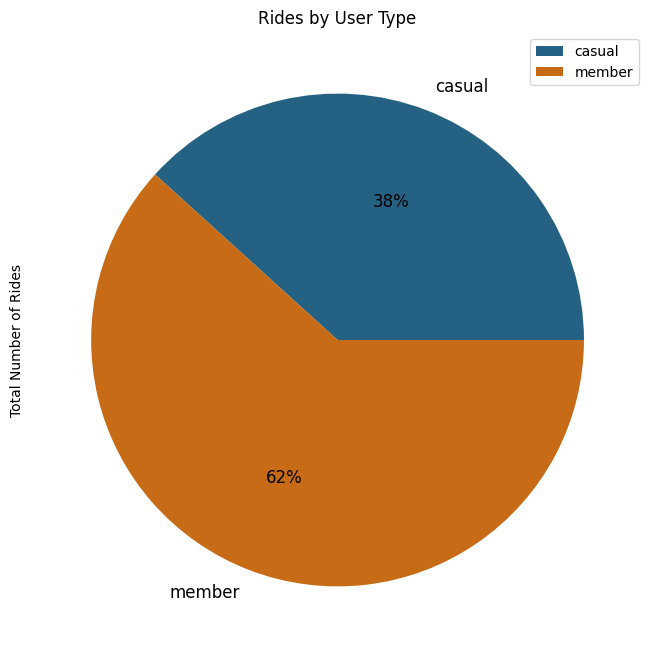

In [49]:
df['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

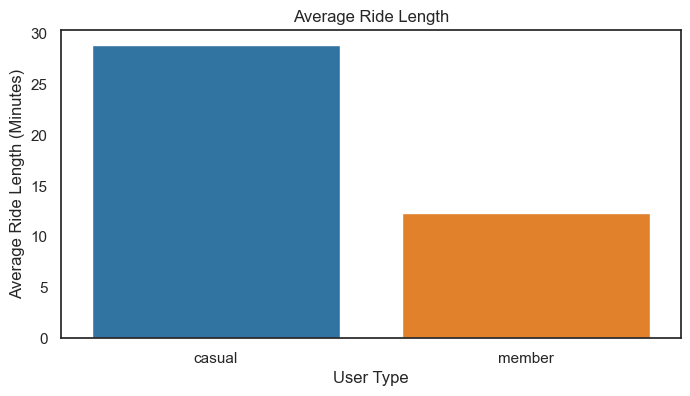

In [50]:
df1 = Bike_share_data[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length',hue='member_casual', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

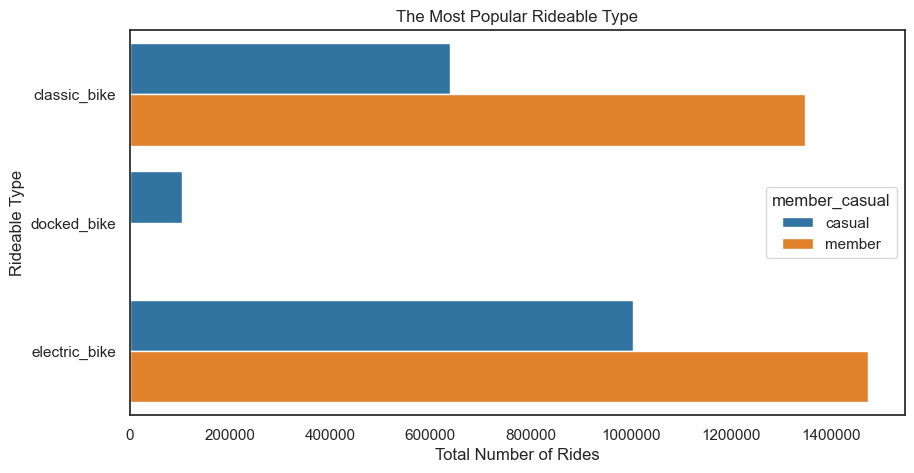

In [51]:
df2 = Bike_share_data[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

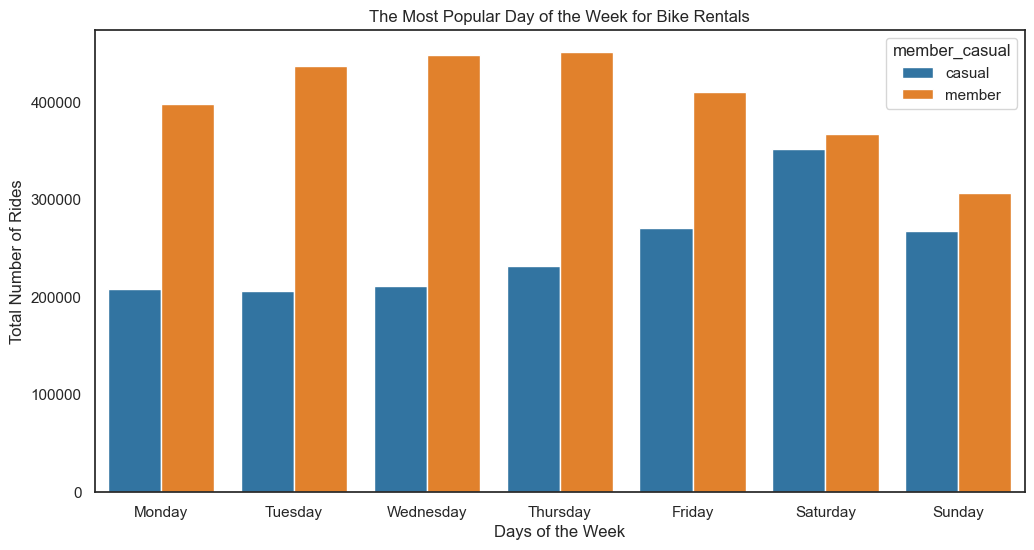

In [52]:
df3 =  Bike_share_data[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

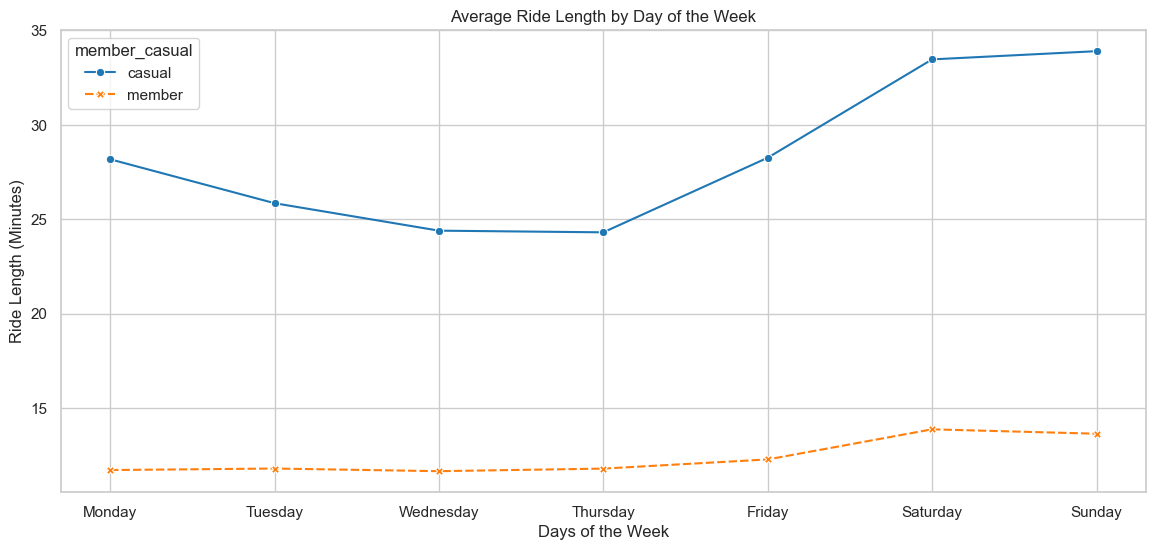

In [53]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
Bike_share_data['dayofweek'] = Bike_share_data['dayofweek'].astype(cat_type)
df5 = Bike_share_data.copy()

df5 = Bike_share_data[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'],observed=False, as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

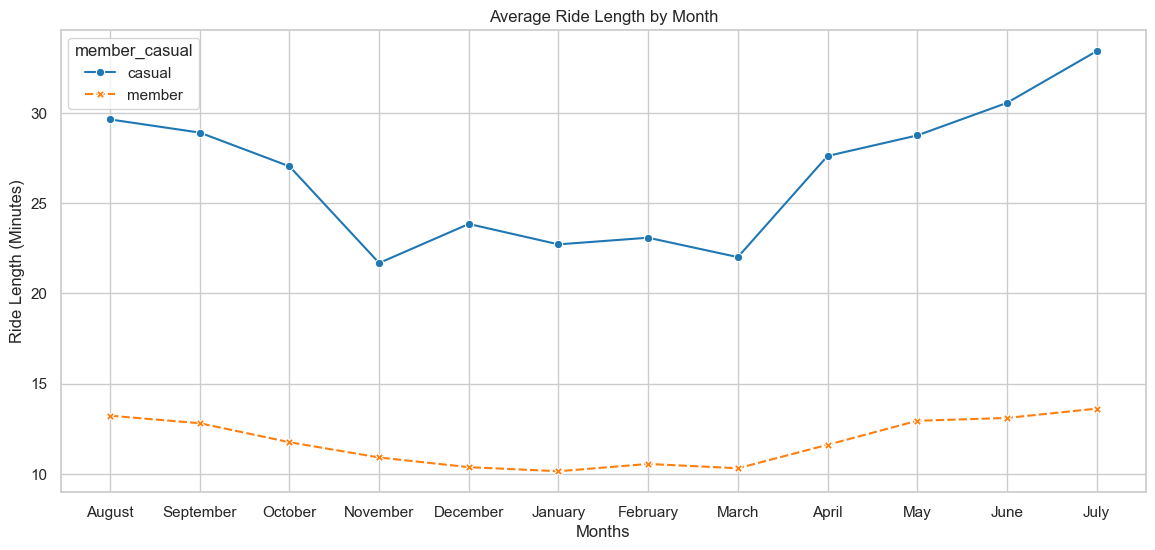

In [54]:
cats = [ 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April','May', 'June', 'July']
cat_type = CategoricalDtype(categories=cats, ordered=True)
Bike_share_data['month'] = Bike_share_data['month'].astype(cat_type)
df6 = Bike_share_data.copy()

df6 = Bike_share_data[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'],observed=False, as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

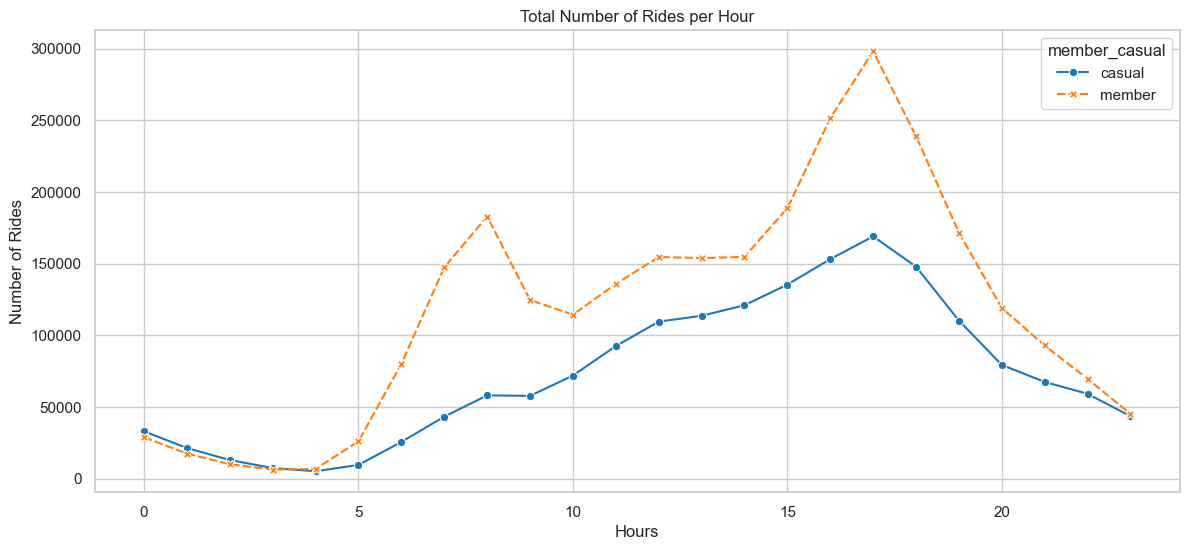

In [55]:
df7 = Bike_share_data[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

In [56]:
import folium
bike_map1=folium.Map([Bike_share_data_inv['start_lat'].values[0],Bike_share_data_inv['start_lng'].values[0]])
for station in Bike_share_data_inv['start_station_id'].unique():
    lat=Bike_share_data_inv.loc[Bike_share_data_inv['start_station_id']==station]['start_lat'].values[0]
    lon=Bike_share_data_inv.loc[Bike_share_data_inv['start_station_id']==station]['start_lng'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1

# Import sklearn and split our data into training and testing data

In [57]:
from sklearn.model_selection import train_test_split
y = Bike_data_inv['Ride_Type']
X = Bike_data_inv.drop(['Ride_Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [58]:
#checking training data 
y_train.value_counts()

Ride_Type
1    1509733
0     905411
Name: count, dtype: int64

In [59]:
X_train.value_counts()

ride_length  Month  Part_of_Week  Hours  classic_bike  docked_bike  electric_bike  Cold   Warm   Late_Night  Morning  Afternoon  Evening  Night
5            8      0             17     True          False        False          False  True   False       False    False      True     False    1054
6            8      0             17     True          False        False          False  True   False       False    False      True     False    1002
7            8      0             17     True          False        False          False  True   False       False    False      True     False     978
6            8      0             18     True          False        False          False  True   False       False    False      True     False     961
             9      0             17     True          False        False          False  True   False       False    False      True     False     958
                                                                                                

In [60]:
#checking test data
X_test.value_counts()

ride_length  Month  Part_of_Week  Hours  classic_bike  docked_bike  electric_bike  Cold   Warm   Late_Night  Morning  Afternoon  Evening  Night
7            8      0             17     True          False        False          False  True   False       False    False      True     False    441
6            7      0             17     True          False        False          False  True   False       False    False      True     False    425
             8      0             17     True          False        False          False  True   False       False    False      True     False    423
5            9      0             17     True          False        False          False  True   False       False    False      True     False    421
             8      0             17     True          False        False          False  True   False       False    False      True     False    419
                                                                                                     

In [61]:
y_test.value_counts()

Ride_Type
1    646640
0    388423
Name: count, dtype: int64

In [62]:
#Lets double check we have no relevant nulls
X_test.isna().sum()

ride_length      0
Month            0
Part_of_Week     0
Hours            0
classic_bike     0
docked_bike      0
electric_bike    0
Cold             0
Warm             0
Late_Night       0
Morning          0
Afternoon        0
Evening          0
Night            0
dtype: int64

# Import RandomForestClassifier for our algorithm

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 20)
rf_train = clf.fit(X_train,y_train)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
clf.predict_proba(X)[0:5]

array([[0.27303681, 0.72696319],
       [0.90758418, 0.09241582],
       [0.64841578, 0.35158422],
       [0.38      , 0.62      ],
       [0.53643361, 0.46356639]])

In [67]:
importance = list(zip(X, clf.feature_importances_))
importance

[('ride_length', 0.4383646332966598),
 ('Month', 0.06532247876631135),
 ('Part_of_Week', 0.06556505658656708),
 ('Hours', 0.07173584280183132),
 ('classic_bike', 0.057059452713867316),
 ('docked_bike', 0.15579786574479879),
 ('electric_bike', 0.044663171071156124),
 ('Cold', 0.023708207716318458),
 ('Warm', 0.0247079838919181),
 ('Late_Night', 0.007281788201547064),
 ('Morning', 0.03562384282816128),
 ('Afternoon', 0.0035508739832488907),
 ('Evening', 0.0024869372506408096),
 ('Night', 0.0041318651469736505)]

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45    388423
           1       0.69      0.89      0.78    646640

    accuracy                           0.69   1035063
   macro avg       0.67      0.62      0.61   1035063
weighted avg       0.68      0.69      0.66   1035063



In [69]:
accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
accuracy

68.50655467348365

# Ride length with fewer variables

In [70]:
Bike_data_inv_time=Bike_data_inv[['Ride_Type','ride_length', 'Month', 'Hours', 'Part_of_Week']].copy()

In [71]:
yt = Bike_data_inv_time['Ride_Type']
Xt = Bike_data_inv_time.drop(['Ride_Type'], axis=1)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt,yt, test_size=0.3, random_state=30)

In [72]:
clft = RandomForestClassifier(n_estimators = 100, random_state = 20)
rft_train = clft.fit(Xt_train,yt_train)

In [73]:
yt_pred = clft.predict(Xt_test)
clft.predict_proba(Xt)[0:5]

array([[0.36207334, 0.63792666],
       [0.94968487, 0.05031513],
       [0.56330439, 0.43669561],
       [0.52666667, 0.47333333],
       [0.58570999, 0.41429001]])

In [74]:
impt = list(zip(Xt, clft.feature_importances_))
impt

[('ride_length', 0.5676589467244457),
 ('Month', 0.141774976301001),
 ('Hours', 0.18267286887309733),
 ('Part_of_Week', 0.10789320810145607)]

In [75]:
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

           0       0.62      0.32      0.42    388423
           1       0.68      0.88      0.77    646640

    accuracy                           0.67   1035063
   macro avg       0.65      0.60      0.60   1035063
weighted avg       0.66      0.67      0.64   1035063



In [76]:
acct = (metrics.accuracy_score(yt_test, yt_pred)) * 100
acct

67.10915181008306

# Just Ride lenght and cold/warm months

In [77]:
Bike_data_inv_temp = Bike_data_inv[['Ride_Type','ride_length', 'Cold', 'Warm']].copy()

In [78]:
Bike_data_inv.head()

,ride_length,Month,Part_of_Week,Hours,Ride_Type,classic_bike,docked_bike,electric_bike,Cold,Warm,Late_Night,Morning,Afternoon,Evening,Night
142,9,8,0,16,0,True,False,False,False,True,False,False,True,False,False
329,61,8,1,14,0,True,False,False,False,True,False,False,True,False,False
357,14,8,1,16,0,False,False,True,False,True,False,False,True,False,False
422,92,8,1,2,0,True,False,False,False,True,True,False,False,False,False
501,1,8,1,0,0,False,False,True,False,True,True,False,False,False,False


In [79]:
ytp = Bike_data_inv_temp['Ride_Type']
Xtp = Bike_data_inv_temp.drop(['Ride_Type'], axis=1)
Xtp_train, Xtp_test, ytp_train, ytp_test = train_test_split(Xtp,ytp, test_size=0.3, random_state=30)

clftp = RandomForestClassifier(n_estimators = 100, random_state = 20)
rftp_train = clftp.fit(Xtp_train,ytp_train)

ytp_pred = clftp.predict(Xtp_test)

In [80]:
clftp.predict_proba(Xtp)[0:5]

array([[0.37811033, 0.62188967],
       [0.82527734, 0.17472266],
       [0.4248323 , 0.5751677 ],
       [0.89810796, 0.10189204],
       [0.28950352, 0.71049648]])

In [81]:
print(classification_report(ytp_test, ytp_pred))

              precision    recall  f1-score   support

           0       0.64      0.21      0.31    388423
           1       0.66      0.93      0.77    646640

    accuracy                           0.66   1035063
   macro avg       0.65      0.57      0.54   1035063
weighted avg       0.65      0.66      0.60   1035063



In [82]:
imptp = list(zip(Xtp, clftp.feature_importances_))
imptp

[('ride_length', 0.8385520998130125),
 ('Cold', 0.08388693196662213),
 ('Warm', 0.07756096822036534)]

In [83]:
acctp = (metrics.accuracy_score(ytp_test, ytp_pred)) * 100
acctp

65.94516469045845

# Just the times of day by our grouped categories

In [84]:
Bike_data_inv_PartOfDay = Bike_data_inv[['Ride_Type','Late_Night', 'Morning', 'Afternoon', 'Evening', 'Night']].copy()

In [85]:
yp = Bike_data_inv_PartOfDay['Ride_Type']
Xp = Bike_data_inv_PartOfDay.drop(['Ride_Type'], axis=1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.3, random_state=30)

clfp = RandomForestClassifier(n_estimators = 100, random_state = 20)
rfp_train = clfp.fit(Xp_train,yp_train)

yp_pred = clfp.predict(Xp_test)

In [86]:
clfp.predict_proba(Xp)[0:5]

array([[0.39787234, 0.60212766],
       [0.39787234, 0.60212766],
       [0.39787234, 0.60212766],
       [0.5375588 , 0.4624412 ],
       [0.5375588 , 0.4624412 ]])

In [87]:
print(classification_report(yp_test, yp_pred))

              precision    recall  f1-score   support

           0       0.54      0.04      0.08    388423
           1       0.63      0.98      0.77    646640

    accuracy                           0.63   1035063
   macro avg       0.58      0.51      0.42   1035063
weighted avg       0.59      0.63      0.51   1035063



In [88]:
imp = list(zip(Xp, clfp.feature_importances_))
imp

[('Late_Night', 0.13773261077416304),
 ('Morning', 0.5964411061849204),
 ('Afternoon', 0.09281965518262704),
 ('Evening', 0.07556402183419046),
 ('Night', 0.09744260602409914)]

In [89]:
accp = (metrics.accuracy_score(yp_test, yp_pred))* 100
accp

62.68913099975557

# Just the best performers:

In [90]:
Bike_data_inv_Best = Bike_data_inv[['Ride_Type','ride_length', 'Morning', 'Hours', 'docked_bike']].copy()

In [91]:
yb = Bike_data_inv_Best['Ride_Type']
Xb = Bike_data_inv_Best.drop(['Ride_Type'], axis=1)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb, test_size=0.3, random_state=30)

clfb = RandomForestClassifier(n_estimators = 100, random_state = 20)
rfb_train = clfb.fit(Xb_train,yb_train)

yb_pred = clfb.predict(Xb_test)

In [92]:
clfb.predict_proba(Xb)[0:5]

array([[0.32730911, 0.67269089],
       [0.83100138, 0.16899862],
       [0.36516274, 0.63483726],
       [0.98      , 0.02      ],
       [0.40490564, 0.59509436]])

In [93]:
print(classification_report(yb_test, yb_pred))

              precision    recall  f1-score   support

           0       0.71      0.25      0.37    388423
           1       0.68      0.94      0.79    646640

    accuracy                           0.68   1035063
   macro avg       0.69      0.59      0.58   1035063
weighted avg       0.69      0.68      0.63   1035063



In [94]:
impb = list(zip(Xb, clfb.feature_importances_))
impb

[('ride_length', 0.4858260952547833),
 ('Morning', 0.07735501051615686),
 ('Hours', 0.09172211309090582),
 ('docked_bike', 0.34509678113815395)]

In [95]:
accb= (metrics.accuracy_score(yb_test, yb_pred)) * 100
accb

68.0459063844423